In [3]:
import pandas as pd
import matplotlib.pyplot as plt

db_orcal = pd.read_csv('db_oracle_11g.csv')
container = pd.read_csv('dcos_container.csv')
docker = pd.read_csv('dcos_docker.csv')
mw_redis = pd.read_csv('mw_redis.csv')
os = pd.read_csv('os_linux.csv')

In [4]:
db_orcal

,itemid,name,bomc_id,timestamp,value,cmdb_id
0,999999998650980,CPU_free_pct,ZJ-002-056,1590076800000,98.850566,db_003
1,999999998651280,CPU_free_pct,ZJ-002-056,1590076800000,97.620771,db_008
2,999999998651276,CPU_Used_Pct,ZJ-002-024,1590076800000,1.609964,db_008
3,999999998650680,CPU_free_pct,ZJ-002-056,1590076800000,99.070884,db_001
4,999999998651100,MEM_real_util,ZJ-002-053,1590076800000,82.090000,db_007
...,...,...,...,...,...,...
160460,999999998650677,tnsping_result_time,ZJ-002-031,1590098397000,0.000000,db_001
160461,999999998650977,tnsping_result_time,ZJ-002-031,1590098397000,0.000000,db_003
160462,999999996512458,MEM_Total,ZJ-002-055,1590098398000,509.343945,db_010
160463,999999996381598,tnsping_result_time,ZJ-002-031,1590098398000,10.000000,db_009


In [5]:
cmdb_group = db_orcal.groupby("cmdb_id")
db = cmdb_group.get_group('db_003')
db["time"] = pd.to_datetime(db.timestamp, unit='ms', origin='1970-01-01 08:00:00')
db = db.sort_values(by='timestamp')
metrics = db.groupby('name')

/var/folders/cw/4fby1b1n00s425pcg97rmnmc0000gn/T/ipykernel_66970/583740822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["time"] = pd.to_datetime(db.timestamp, unit='ms', origin='1970-01-01 08:00:00')


In [6]:
metric_dict = {}
for k,v in list(metrics):
    val = v.loc[v.timestamp <= 1590077745000].value.tolist()
    if not all(map(lambda x: x == val[0], val)):
        metric_dict[k] = val
metric_dict

{'ACS': [0.01,
  0.01,
  0.01,
  0.01,
  0.02,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01],
 'AIOS': [0.0, 0.02, 0.0, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
 'AWS': [0.02,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'CPU_Used_Pct': [1.149434,
  2.44065,
  2.44065,
  2.633394,
  2.724999,
  2.722698,
  2.123959,
  4.077714,
  4.077714,
  2.462365,
  2.004974,
  2.563361,
  2.61825],
 'CPU_free_pct': [98.850566,
  96.504012,
  97.55935,
  97.77158,
  97.366606,
  97.275001,
  97.277302,
  97.876041,
  95.922286,
  97.537635,
  97.995026,
  97.436639,
  97.464214,
  97.38175,
  97.841627],
 'Call_Per_Sec': [12.4,
  173.9,
  153.8,
  169.7,
  190.3,
  185.2,
  179.9,
  3.4,
  3.4,
  3.4,
  3.4,
  18.1,
  110.3,
  217.1,
  200.2],
 'DFParaWrite_Per_Sec': [1.63,
  0.8,
  1.58,
  1.05,
  1.51,
  1.37,
  1.42,
  1.29,
  1.61,
  1.59,
  1.6,
  1.86],
 'DbTime': [8.8,
  102.6,
  110.9,
  108.9,
  111.3,
  107.1,
  113.1,


In [7]:
db_values = db[['name', 'timestamp', 'value']]
db_values

,name,timestamp,value
0,CPU_free_pct,1590076800000,98.850566
21,CPU_Used_Pct,1590076813000,1.149434
39,Used_Tbs_Size,1590076826000,17450.400000
41,SEQ_Used_Pct,1590076826000,1.000000
75,LFParaWrite_Per_Sec,1590076834000,1.470000
...,...,...,...
160443,MEM_real_util,1590098385000,45.690000
160447,MEM_Used,1590098393000,194.719396
160450,MEM_Total,1590098394000,381.902264
160454,MEM_Used_Pct,1590098395000,50.987952


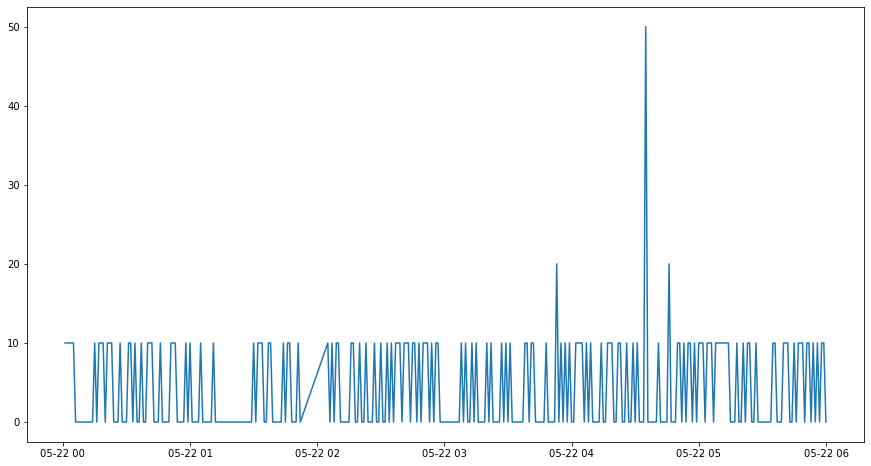

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,8])
rc = metrics.get_group('tnsping_result_time')
plt.plot(rc.time, rc.value)

In [9]:
from tsfresh import extract_features
ext_features = extract_features(db_values, column_id='name', column_sort='timestamp')
ext_features = ext_features.dropna(axis=1, how='any')
#ext_features = ext_features.to_numpy()
#ext_features.shape

Feature Extraction: 100%|███████| 16/16 [00:04<00:00,  3.45it/s]


In [13]:
ext_features_t = ext_features.T
ext_features_t

,ACS,AIOS,AWS,Asm_Free_Tb,CPU_Used_Pct,CPU_free_pct,Call_Per_Sec,DFParaWrite_Per_Sec,DbTime,Exec_Per_Sec,...,Session_pct,TPS_Per_Sec,Tbs_Free_Gb,Tbs_Used_Pct,TempTbs_Pct,Total_Tbs_Size,UndoTbs_Pct,Used_Tbs_Size,User_Commit,tnsping_result_time
value__variance_larger_than_standard_deviation,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,1.000000
value__has_duplicate_max,0.000000,0.000000,1.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00,1.0,1.0,1.00,1.000000,1.000000,1.000000,0.000000
value__has_duplicate_min,1.000000,1.000000,1.000000,1.00,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.00,1.0,1.0,1.00,1.000000,0.000000,1.000000,1.000000
value__has_duplicate,1.000000,1.000000,1.000000,1.00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000
value__sum_values,4.120000,2.590000,1.760000,233.83,507.440361,32806.463762,70411.300000,502.340000,30448.600000,33289.700000,...,105.714000,9806.800000,1394.58,1082.4,0.0,550161.32,18.430000,750367.620000,367.310000,1460.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
value__permutation_entropy__dimension_4__tau_1,2.085333,2.064199,1.996559,-0.00,3.093726,3.080745,3.158176,3.133939,2.852296,3.124762,...,2.767012,3.151090,-0.00,-0.0,-0.0,-0.00,1.667462,1.264740,2.901899,2.274229
value__permutation_entropy__dimension_5__tau_1,2.827402,2.864852,2.726369,-0.00,4.419325,4.431468,4.600645,4.523546,3.891744,4.504157,...,3.731637,4.599600,-0.00,-0.0,-0.0,-0.00,1.747868,1.601198,3.895968,3.109033
value__permutation_entropy__dimension_6__tau_1,3.466442,3.508009,3.317627,-0.00,5.243565,5.324575,5.499429,5.451762,4.601885,5.395942,...,4.422034,5.514693,-0.00,-0.0,-0.0,-0.00,1.791759,1.882124,4.571500,3.852095
value__permutation_entropy__dimension_7__tau_1,3.946434,4.040391,3.737923,-0.00,5.548186,5.672517,5.738069,5.725758,5.069952,5.712710,...,4.922081,5.753380,-0.00,-0.0,-0.0,-0.00,1.609438,2.167324,5.028349,4.467138


In [14]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz

cg = pc(ext_features_t, 0.05, fisherz, False, 0, -1)

AssertionError: 